In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize=(450,350)
from rdkit.Chem import rdRGroupDecomposition
from rdkit.Chem import rdqueries
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit import Geometry
rdDepictor.SetPreferCoordGen(True)
import pandas as pd

from IPython.display import SVG,Image
from ipywidgets import interact

import rdkit
print(rdkit.__version__)

2020.09.1


In [31]:
df = pd.read_csv('../data/cdk2_rgd_dataset.csv')
df.head()

,assay_id,doc_id,description,assay_organism,assay_chembl_id,aidx,pref_name,activity_id,molregno,standard_relation,...,src_id (#1),type,relation,value,units,text_value,standard_text_value,standard_inchi_key,canonical_smiles,compound_chembl_id
0,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,265814,68026,>,...,1,Ki,>,20.00,uM,NaN,NaN,RPXWUUDZINQPTJ-UHFFFAOYSA-N,CNc1nccc(n1)c2sc(C)nc2C,CHEMBL46474
1,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,265817,67880,=,...,1,Ki,=,0.14,uM,NaN,NaN,GDZTURHUKDAJGD-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(Nc3ccc(O)cc3)n2,CHEMBL442957
2,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267078,67751,=,...,1,Ki,=,6.50,uM,NaN,NaN,CTFDMGIBHFQWKB-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(N)n2,CHEMBL47302
3,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267081,67782,=,...,1,Ki,=,1.20,uM,NaN,NaN,HOKDXVAONYXHJK-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(Nc3ccccc3F)n2,CHEMBL297447
4,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267084,67961,=,...,1,Ki,=,0.11,uM,NaN,NaN,XNKSRGHGPSHYIW-UHFFFAOYSA-N,CNc1nc(C)c(s1)c2ccnc(Nc3cccc(O)c3)n2,CHEMBL44119


In [33]:
df_doc1 = df[df.assay_chembl_id=='CHEMBL827377']
print(len(df_doc1))
df_doc1.head()

91


,assay_id,doc_id,description,assay_organism,assay_chembl_id,aidx,pref_name,activity_id,molregno,standard_relation,...,src_id (#1),type,relation,value,units,text_value,standard_text_value,standard_inchi_key,canonical_smiles,compound_chembl_id
47,302524,21080,Binding affinity for human cyclin-dependent ki...,Homo sapiens,CHEMBL827377,CLD0,Cyclin-dependent kinase 2,1438958,305637,>,...,1,Ki,>,19.95,uM,NaN,NaN,TWQUOUJLNRGSRZ-UHFFFAOYSA-N,Cc1ccc2c(c3ccnc(Nc4cccc(c4)C(F)(F)F)n3)c(nn2n1...,CHEMBL182493
48,302524,21080,Binding affinity for human cyclin-dependent ki...,Homo sapiens,CHEMBL827377,CLD0,Cyclin-dependent kinase 2,1438962,305651,>,...,1,Ki,>,19.95,uM,NaN,NaN,CYHPFZLFUXOCJJ-UHFFFAOYSA-N,Cc1ccc2c(c3ccnc(Nc4ccc(F)c(F)c4)n3)c(nn2n1)c5c...,CHEMBL182326
49,302524,21080,Binding affinity for human cyclin-dependent ki...,Homo sapiens,CHEMBL827377,CLD0,Cyclin-dependent kinase 2,1439061,305664,>,...,1,Ki,>,19.95,uM,NaN,NaN,MYSOMHSTKVRJRA-UHFFFAOYSA-N,Cc1ccc2c(c3ccnc(Nc4ccc5OCCOc5c4)n3)c(nn2n1)c6c...,CHEMBL183064
50,302524,21080,Binding affinity for human cyclin-dependent ki...,Homo sapiens,CHEMBL827377,CLD0,Cyclin-dependent kinase 2,1439063,305674,>,...,1,Ki,>,19.95,uM,NaN,NaN,VUGNSTAXWJUVEZ-UHFFFAOYSA-N,Cc1ccc2c(c3ccnc(Nc4ccc(Cl)c(c4)C(F)(F)F)n3)c(n...,CHEMBL361038
51,302524,21080,Binding affinity for human cyclin-dependent ki...,Homo sapiens,CHEMBL827377,CLD0,Cyclin-dependent kinase 2,1439065,305687,=,...,1,Ki,=,3.98,uM,NaN,NaN,BWBMBCPGRIOUNV-UHFFFAOYSA-N,C1CC1c2nn3ncccc3c2c4ccnc(Nc5ccccc5)n4,CHEMBL362296


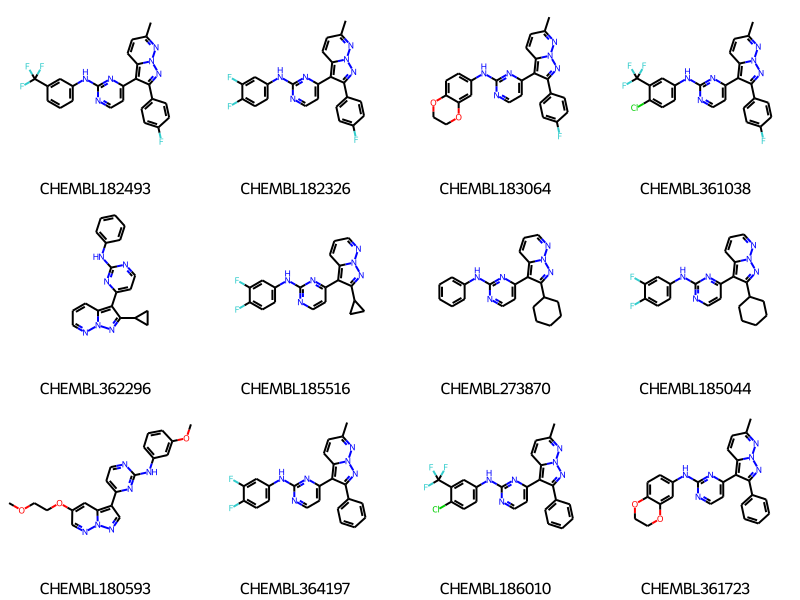

In [58]:
rdDepictor.SetPreferCoordGen(True)
smis = df_doc1['canonical_smiles']
cids = list(df_doc1.compound_chembl_id)
ms = [Chem.MolFromSmiles(x) for x in smis]
for m in ms:
    rdDepictor.Compute2DCoords(m)
Draw.MolsToGridImage(ms[:12],legends=cids,molsPerRow=4)

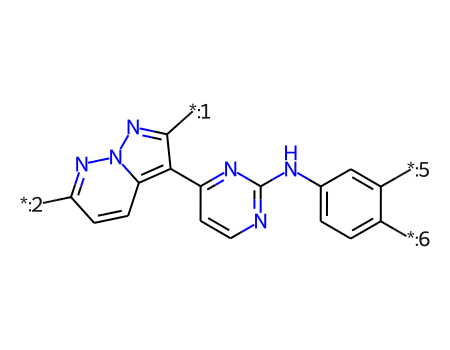

In [59]:
core = Chem.MolFromSmiles('c1cc(-c2c([*:1])nn3nc([*:2])ccc23)nc(N(c2ccc([*:6])c([*:5])c2))n1')
rdDepictor.SetPreferCoordGen(True)
rdDepictor.Compute2DCoords(core)
core

In [60]:
ps = Chem.AdjustQueryParameters.NoAdjustments()
ps.makeDummiesQueries=True
qcore = Chem.AdjustQueryProperties(core,ps)
mhs = [Chem.AddHs(x,addCoords=True) for x in ms]
mms = [x for x in mhs if x.HasSubstructMatch(qcore)]
print(len(mhs),len(mms))

91 91


In [61]:
rdkit.RDLogger.DisableLog('rdApp.warning')
for m in mms:
    for atom in m.GetAtoms():
        atom.SetIntProp("SourceAtomIdx",atom.GetIdx())
groups,_ = rdRGroupDecomposition.RGroupDecompose([qcore],mms,asSmiles=False,asRows=True)


In [70]:
from collections import defaultdict

def highlight_rgroups(mol,row,core,width=350,height=200,
                      fillRings=True,legend="",
                      sourceIdxProperty="SourceAtomIdx",
                      lbls=('R1','R2','R5','R6')):
    # copy the molecule and core
    mol = Chem.Mol(mol)
    core = Chem.Mol(core)

    # -------------------------------------------
    # include the atom map numbers in the substructure search in order to 
    # try to ensure a good alignment of the molecule to symmetric cores
    for at in core.GetAtoms():
        if at.GetAtomMapNum():
            at.ExpandQuery(rdqueries.IsotopeEqualsQueryAtom(200+at.GetAtomMapNum()))
            
    for lbl in row:
        if lbl=='Core':
            continue
        rg = row[lbl]
        for at in rg.GetAtoms():
            if not at.GetAtomicNum() and at.GetAtomMapNum() and \
            at.HasProp('dummyLabel') and at.GetProp('dummyLabel')==lbl:
                # attachment point. the atoms connected to this
                # should be from the molecule
                for nbr in at.GetNeighbors():
                    if nbr.HasProp(sourceIdxProperty):
                        mAt = mol.GetAtomWithIdx(nbr.GetIntProp(sourceIdxProperty))
                        if mAt.GetIsotope():
                            mAt.SetIntProp('_OrigIsotope',mAt.GetIsotope())
                        mAt.SetIsotope(200+at.GetAtomMapNum())
    # remove unmapped hs so that they don't mess up the depiction
    rhps = Chem.RemoveHsParameters()
    rhps.removeMapped = False
    tmol = Chem.RemoveHs(mol,rhps)
    rdDepictor.GenerateDepictionMatching2DStructure(tmol,core)

    oldNewAtomMap={}
    # reset the original isotope values and account for the fact that
    # removing the Hs changed atom indices
    for i,at in enumerate(tmol.GetAtoms()):
        if at.HasProp(sourceIdxProperty):
            oldNewAtomMap[at.GetIntProp(sourceIdxProperty)] = i
            if at.HasProp("_OrigIsotope"):
                at.SetIsotope(at.GetIntProp("_OrigIsotope"))
                at.ClearProp("_OrigIsotope")
            else:
                at.SetIsotope(0)
      
    # ------------------
    #  set up our colormap
    #   the three choices here are all "colorblind" colormaps
    
    # "Tol" colormap from https://davidmathlogic.com/colorblind
    colors = [(51,34,136),(17,119,51),(68,170,153),(136,204,238),(221,204,119),(204,102,119),(170,68,153),(136,34,85)]
    # "IBM" colormap from https://davidmathlogic.com/colorblind
    colors = [(100,143,255),(120,94,240),(220,38,127),(254,97,0),(255,176,0)]
    # Okabe_Ito colormap from https://jfly.uni-koeln.de/color/
    colors = [(230,159,0),(86,180,233),(0,158,115),(240,228,66),(0,114,178),(213,94,0),(204,121,167)]
    for i,x in enumerate(colors):
        colors[i] = tuple(y/255 for y in x)
  
    #----------------------
    # Identify and store which atoms, bonds, and rings we'll be highlighting
    highlightatoms = defaultdict(list)
    highlightbonds = defaultdict(list)
    atomrads = {}
    widthmults = {}

    rings = []
    for i,lbl in enumerate(lbls):    
        color = colors[i%len(colors)]
        rquery = row[lbl]
        Chem.GetSSSR(rquery)
        rinfo = rquery.GetRingInfo()
        for at in rquery.GetAtoms():
            if at.HasProp(sourceIdxProperty):
                origIdx = oldNewAtomMap[at.GetIntProp(sourceIdxProperty)]
                highlightatoms[origIdx].append(color)
                atomrads[origIdx] = 0.4
        if fillRings:
            for aring in rinfo.AtomRings():
                tring = []
                allFound = True
                for aid in aring:
                    at = rquery.GetAtomWithIdx(aid)
                    if not at.HasProp(sourceIdxProperty):
                        allFound = False
                        break
                    tring.append(oldNewAtomMap[at.GetIntProp(sourceIdxProperty)])
                if allFound:
                    rings.append((tring,color))
        for qbnd in rquery.GetBonds():
            batom = qbnd.GetBeginAtom()
            eatom = qbnd.GetEndAtom()
            if batom.HasProp(sourceIdxProperty) and eatom.HasProp(sourceIdxProperty):
                origBnd = tmol.GetBondBetweenAtoms(oldNewAtomMap[batom.GetIntProp(sourceIdxProperty)],
                                                 oldNewAtomMap[eatom.GetIntProp(sourceIdxProperty)])
                bndIdx = origBnd.GetIdx()
                highlightbonds[bndIdx].append(color)
                widthmults[bndIdx] = 2

    d2d = rdMolDraw2D.MolDraw2DCairo(width,height)
    dos = d2d.drawOptions()
    dos.useBWAtomPalette()
                
    #----------------------
    # if we are filling rings, go ahead and do that first so that we draw
    # the molecule on top of the filled rings
    if fillRings and rings:
        # a hack to set the molecule scale
        d2d.DrawMoleculeWithHighlights(tmol,legend,dict(highlightatoms),
                                       dict(highlightbonds),
                                       atomrads,widthmults)
        d2d.ClearDrawing()
        conf = tmol.GetConformer()
        for (aring,color) in rings:
            ps = []
            for aidx in aring:
                pos = Geometry.Point2D(conf.GetAtomPosition(aidx))
                ps.append(pos)
            d2d.SetFillPolys(True)
            d2d.SetColour(color)
            d2d.DrawPolygon(ps)
        dos.clearBackground = False

    #----------------------
    # now draw the molecule, with highlights:
    d2d.DrawMoleculeWithHighlights(tmol,legend,dict(highlightatoms),dict(highlightbonds),
                                   atomrads,widthmults)
    d2d.FinishDrawing()
    png = d2d.GetDrawingText()
    return png


In [71]:
@interact(idx=range(0,len(ms)))
def draw_it(idx=0):
    m = mms[idx]
    row = groups[idx]
    return Image(highlight_rgroups(m,row,qcore,lbls=('R1','R2','R5','R6')))


interactive(children=(Dropdown(description='idx', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…

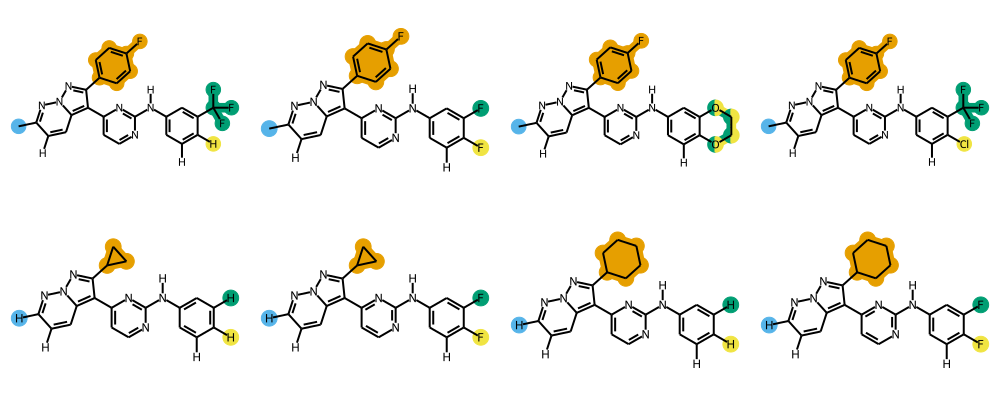

In [67]:
from PIL import Image as pilImage
from io import BytesIO

def draw_multiple(ms,groups,qcore,lbls,legends=None,nPerRow=4,subImageSize=(250,200)):
    nRows = len(ms)//nPerRow
    if len(ms)%nPerRow:
        nRows+=1
    nCols = nPerRow
    imgSize = (subImageSize[0]*nCols,subImageSize[1]*nRows)
    res = pilImage.new('RGB',imgSize)
    
    for i,m in enumerate(ms):
        col = i%nPerRow
        row = i//nPerRow
        if legends:
            legend = legends[i]
        else:
            legend = ''
        png = highlight_rgroups(m,groups[i],qcore,lbls=lbls,legend=legend,
                               width=subImageSize[0],height=subImageSize[1])
        bio = BytesIO(png)
        img = pilImage.open(bio)
        res.paste(img,box=(col*subImageSize[0],row*subImageSize[1]))
    bio = BytesIO()
    res.save(bio,format='PNG')
    return bio.getvalue()
Image(draw_multiple(mms[:8],groups,qcore,('R1','R2','R5','R6')))

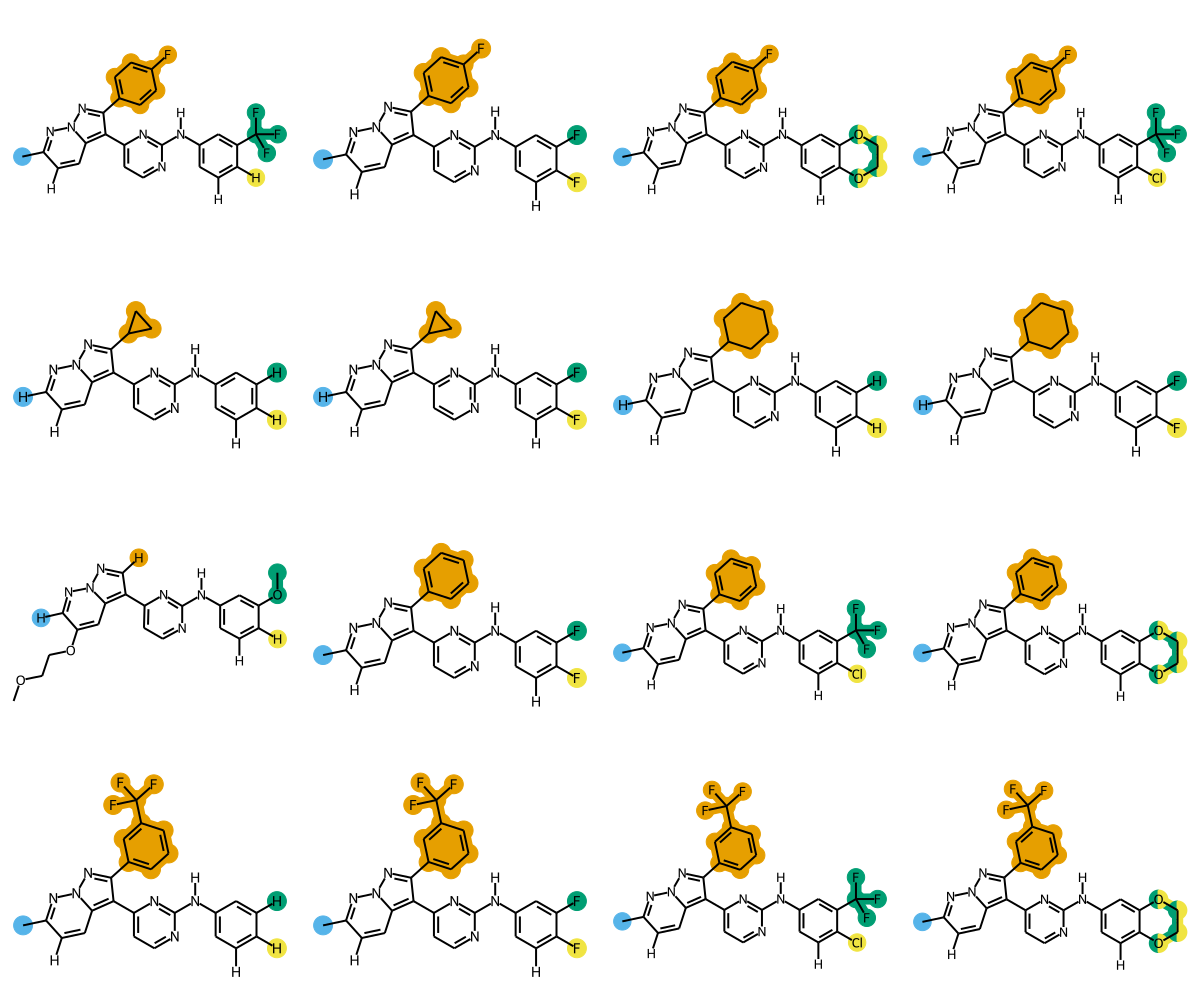

In [69]:
Image(draw_multiple(mms[:16],groups,qcore,('R1','R2','R5','R6'),subImageSize=(300,250)))

In [42]:
df_doc2 = df[df.assay_chembl_id=='CHEMBL658107']
print(len(df_doc2))
df_doc2.head()

33


,assay_id,doc_id,description,assay_organism,assay_chembl_id,aidx,pref_name,activity_id,molregno,standard_relation,...,src_id (#1),type,relation,value,units,text_value,standard_text_value,standard_inchi_key,canonical_smiles,compound_chembl_id
0,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,265814,68026,>,...,1,Ki,>,20.00,uM,NaN,NaN,RPXWUUDZINQPTJ-UHFFFAOYSA-N,CNc1nccc(n1)c2sc(C)nc2C,CHEMBL46474
1,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,265817,67880,=,...,1,Ki,=,0.14,uM,NaN,NaN,GDZTURHUKDAJGD-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(Nc3ccc(O)cc3)n2,CHEMBL442957
2,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267078,67751,=,...,1,Ki,=,6.50,uM,NaN,NaN,CTFDMGIBHFQWKB-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(N)n2,CHEMBL47302
3,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267081,67782,=,...,1,Ki,=,1.20,uM,NaN,NaN,HOKDXVAONYXHJK-UHFFFAOYSA-N,Cc1nc(C)c(s1)c2ccnc(Nc3ccccc3F)n2,CHEMBL297447
4,50641,17759,Inhibitory activity against human CDK2 (Cyclin...,NaN,CHEMBL658107,CLD0,Cyclin-dependent kinase 2,267084,67961,=,...,1,Ki,=,0.11,uM,NaN,NaN,XNKSRGHGPSHYIW-UHFFFAOYSA-N,CNc1nc(C)c(s1)c2ccnc(Nc3cccc(O)c3)n2,CHEMBL44119


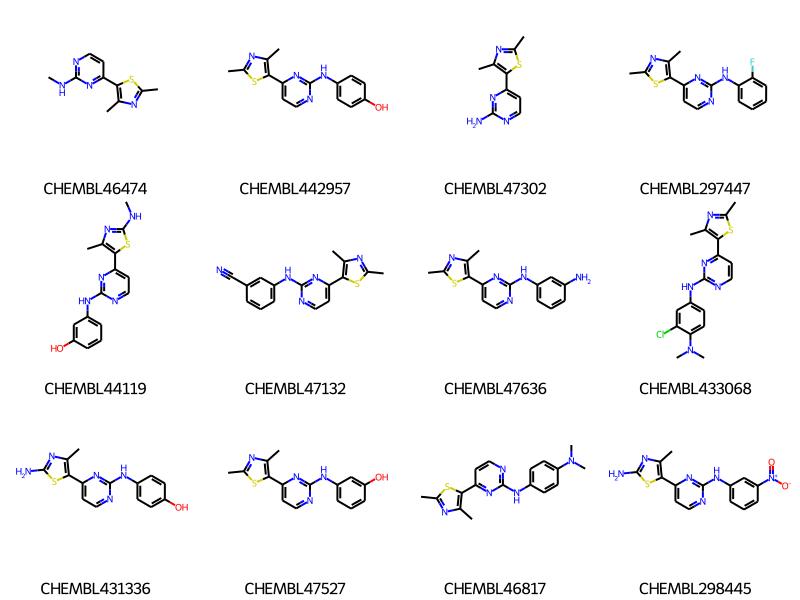

In [46]:
smis = df_doc2['canonical_smiles']
cids = list(df_doc2.compound_chembl_id)
ms = [Chem.MolFromSmiles(x) for x in smis]
for m in ms:
    rdDepictor.Compute2DCoords(m)
Draw.MolsToGridImage(ms[:12],legends=cids,molsPerRow=4)

In [47]:
core = Chem.MolFromSmiles('Cc1nc([*:3])sc1-c1ccnc(N([*:1])[*:2])n1')
ps = Chem.AdjustQueryParameters.NoAdjustments()
ps.makeDummiesQueries=True
qcore = Chem.AdjustQueryProperties(core,ps)
mhs = [Chem.AddHs(x,addCoords=True) for x in ms]
mms = [x for x in mhs if x.HasSubstructMatch(qcore)]
print(Chem.MolToSmarts(qcore))
print(len(mhs),len(mms))

[#6]-[#6]1:[#7]:[#6](-[*:3]):[#16]:[#6]:1-[#6]1:[#6]:[#6]:[#7]:[#6](-[#7](-[*:1])-[*:2]):[#7]:1
33 33


In [48]:
rdkit.RDLogger.DisableLog('rdApp.warning')
for m in mms:
    for atom in m.GetAtoms():
        atom.SetIntProp("SourceAtomIdx",atom.GetIdx())
groups,_ = rdRGroupDecomposition.RGroupDecompose([qcore],mms,asSmiles=False,asRows=True)

In [49]:
rdDepictor.SetPreferCoordGen(True)
rdDepictor.Compute2DCoords(qcore)

0

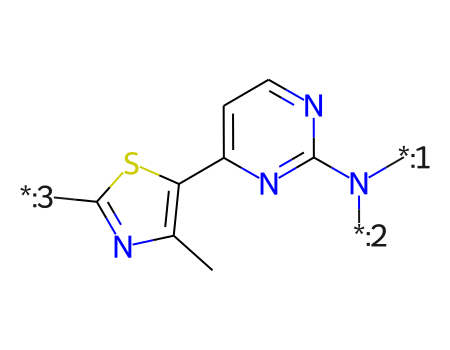

In [50]:
qcore

In [51]:
@interact(idx=range(0,len(mms)))
def draw_it(idx=0):
    m = mms[idx]
    row = groups[idx]
    return Image(highlight_rgroups(m,row,qcore,lbls=('R1','R2','R3')))


interactive(children=(Dropdown(description='idx', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…

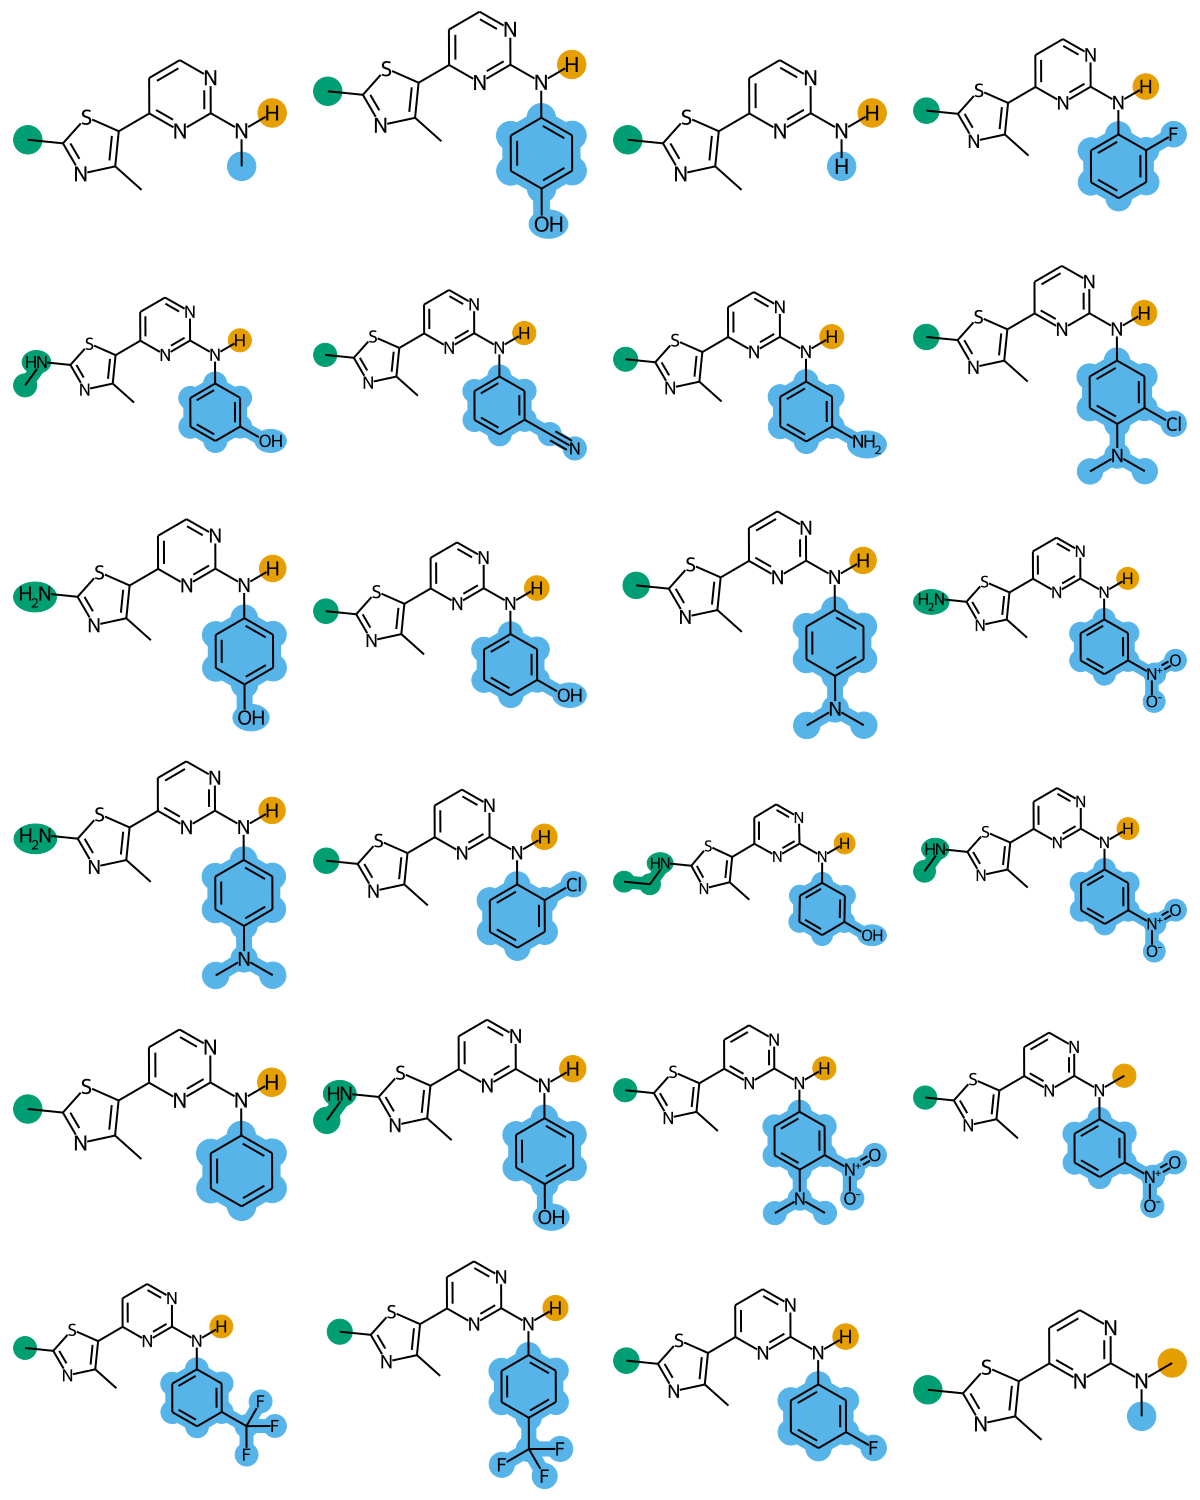

In [20]:
Image(draw_multiple(mms[:12],groups,qcore,('R1','R2','R3'),subImageSize=(300,250)))

In [52]:
df_doc3 = df[df.assay_chembl_id=='CHEMBL3101313']
print(len(df_doc3))
df_doc3.head()

25


,assay_id,doc_id,description,assay_organism,assay_chembl_id,aidx,pref_name,activity_id,molregno,standard_relation,...,src_id (#1),type,relation,value,units,text_value,standard_text_value,standard_inchi_key,canonical_smiles,compound_chembl_id
1129,1281340,76402,Displacement of B-Alexa-Fluor647 from CDK2 (un...,Homo sapiens,CHEMBL3101313,CLD0,Cyclin-dependent kinase 2,13859835,1610535,<,...,1,Ki,<,0.10,uM,NaN,NaN,USOUMMYIFYDJEI-ZZTDINLMSA-N,COC[C@H](Cc1ccc(O)cc1)NC(=O)c2cc(C(=O)O)c3cc(\...,CHEMBL3099753
1130,1281340,76402,Displacement of B-Alexa-Fluor647 from CDK2 (un...,Homo sapiens,CHEMBL3101313,CLD0,Cyclin-dependent kinase 2,13859836,1610534,=,...,1,Ki,=,0.10,uM,NaN,NaN,DLJWCYCMLMVSML-FQEVSTJZSA-N,COC[C@H](Cc1ccc(O)cc1)NC(=O)c2cc(C(=O)O)c3cc(c...,CHEMBL3099752
1131,1281340,76402,Displacement of B-Alexa-Fluor647 from CDK2 (un...,Homo sapiens,CHEMBL3101313,CLD0,Cyclin-dependent kinase 2,13859837,1610533,=,...,1,Ki,=,0.16,uM,NaN,NaN,BHBDKGIDYKROMY-BAJJQUEBSA-N,CN(C)C(=O)[C@H](Cc1ccc(O)cc1)NC(=O)c2cc(C(=O)O...,CHEMBL3099751
1132,1281340,76402,Displacement of B-Alexa-Fluor647 from CDK2 (un...,Homo sapiens,CHEMBL3101313,CLD0,Cyclin-dependent kinase 2,13859838,1610532,=,...,1,Ki,=,0.10,uM,NaN,NaN,IYRLCOILNQBJEJ-ZNOKPGKASA-N,CNC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)c2cc(C(=O)O)c3...,CHEMBL3099750
1133,1281340,76402,Displacement of B-Alexa-Fluor647 from CDK2 (un...,Homo sapiens,CHEMBL3101313,CLD0,Cyclin-dependent kinase 2,13859839,1610531,=,...,1,Ki,=,0.30,uM,NaN,NaN,DDIHZTFUIFPFOO-OAQYLSRUSA-N,CCC[C@H](Cc1ccc(O)cc1)NC(=O)c2cc(C(=O)O)c3cc(c...,CHEMBL3099749


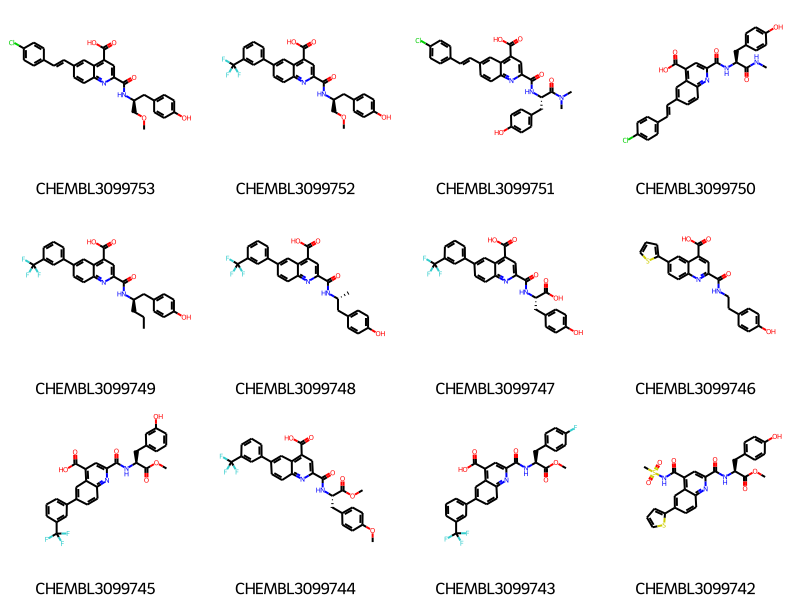

In [53]:
smis = df_doc3['canonical_smiles']
cids = list(df_doc3.compound_chembl_id)
ms = [Chem.MolFromSmiles(x) for x in smis]
for m in ms:
    rdDepictor.Compute2DCoords(m)
Draw.MolsToGridImage(ms[:12],legends=cids,molsPerRow=4)

25 22


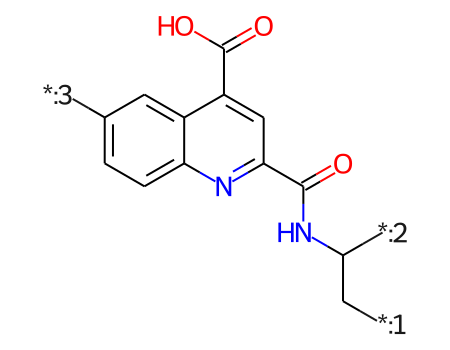

In [54]:
core = Chem.MolFromSmiles('OC(=O)c1cc(C(=O)NC(C[*:1])[*:2])nc2ccc([*:3])cc12')
ps = Chem.AdjustQueryParameters.NoAdjustments()
ps.makeDummiesQueries=True
qcore = Chem.AdjustQueryProperties(core,ps)
mhs = [Chem.AddHs(x,addCoords=True) for x in ms]
mms = [x for x in mhs if x.HasSubstructMatch(qcore)]
print(len(mhs),len(mms))
rdDepictor.SetPreferCoordGen(True)
rdDepictor.Compute2DCoords(qcore)
qcore

In [55]:
rdkit.RDLogger.DisableLog('rdApp.warning')
for m in mms:
    for atom in m.GetAtoms():
        atom.SetIntProp("SourceAtomIdx",atom.GetIdx())
groups,_ = rdRGroupDecomposition.RGroupDecompose([qcore],mms,asSmiles=False,asRows=True)

In [56]:
@interact(idx=range(0,len(mms)))
def draw_it(idx=0):
    m = mms[idx]
    row = groups[idx]
    return Image(highlight_rgroups(m,row,qcore,lbls=('R1','R2','R3')))


interactive(children=(Dropdown(description='idx', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…

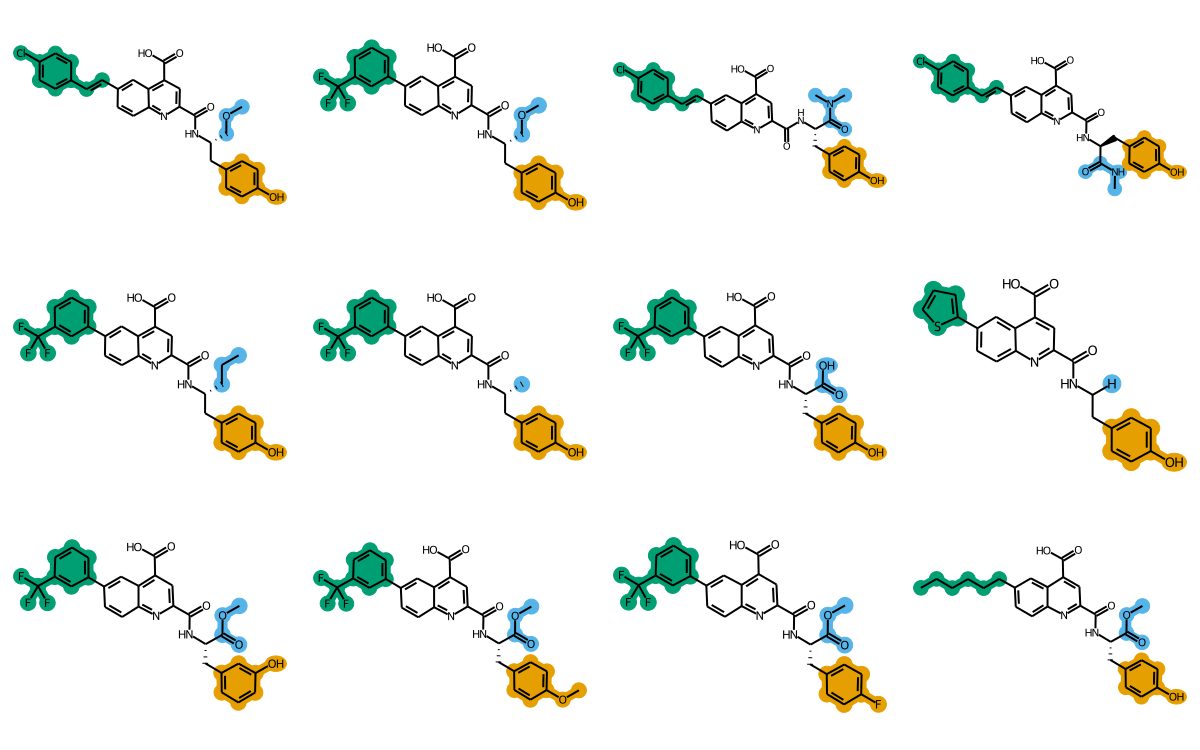

In [57]:
Image(draw_multiple(mms[:12],groups,qcore,('R1','R2','R3'),subImageSize=(300,250)))